## Introduction to natural language processing

Natural language processing (NLP) is a collective term referring to computational processing of human languages. It includes methods that analyse human-produced text, and methods that create natural language as output. Compared to many other machine learning tasks, natural language processing is very challenging, as human language is inherently ambiguous, ever-changing, and not well-defined. 

![read_robot](./images/read_robot.jpg)

There is a need for better and better NLP-algorithms, as information in the textual format is increasing exponentially.

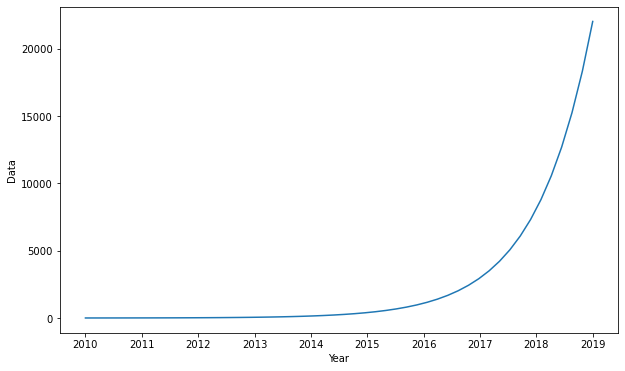

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.plot(np.linspace(1,10,50),np.exp(np.linspace(1,10,50)))
plt.xticks(range(1,11),labels=range(2010,2020))
plt.xlabel('Year')
plt.ylabel('Data')
plt.show()

Until 2014, core NLP techniques were dominated by linear modelling approaches that use supervised learning. Key algorithms were simple neural networks, support vector machines and logistic regression, trained over high dimensional and sparse feature vectors (bag-of-words -vectors).

![SVM](./images/svm.png)


### Topic models
A topic model is a type of statistical model for inferring the "topics" or "themes" that occur in a collection of documents. Topic modelling is a popular tool for the discovery of hidden semantic structures in a text body. Topic models assume that there are typical words that appear more frequently in a document with a certain topic. Moreover, some words are especially rare for a certain topic and for some words, there is no difference between a document with the topic and other documents. The "topics" produced by topic modelling techniques are clusters of similar words. For example, a very popular topic model called Latent Dirichlet Allocation assumes that documents are distributions of topics and topics are distributions of words.

![topic_model](./images/topic_model.gif)



### NLP example - LDA and other summarisation tools
In this example, we analyse a collection of academic journals with Latent Dirichlet Allocation (LDA) and other summarisation tools.

To manipulate and list files in directories, we need the **os** -library.

In [2]:
import os

I have the data in the acc_journals -folder that is under the work folder. Unfortunately, this data is not available anywhere. If you want to follow this example, just put a collection of txt-files to a "acc_journals"-folder (under the work folder) and follow the steps.

In [3]:
data_path = './acc_journals/'

**listdir()** makes a list of filenames inside **data_path**

In [4]:
files = os.listdir(data_path)

The name of the first text file is "2019_1167.txt".

In [5]:
files[0]

'2019_1167.txt'

In total, we have 2126 articles.

In [6]:
len(files)

2126

The filenames have a publication year as the first four digits of the name. With the following code we can collect the publication years to a list.

In [7]:
file_years = []
for file in files:
    file_years.append(int(file[:4])) # Pick the first four letters from the filename -string and turn it into a integer.

In [8]:
[file_years.count(a) for a in set(file_years)]

[260, 296, 297, 134, 128, 129, 174, 234, 226, 248]

In this example we will need **numpy** to manipulate arrays, and **Matplotlib** for plots.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Let's plot the number of documents per year.

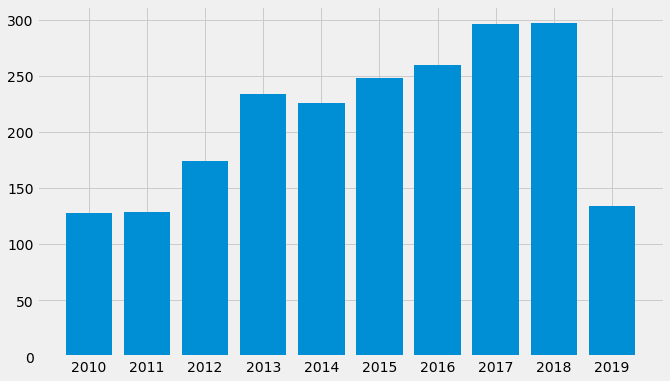

In [11]:
plt.style.use('fivethirtyeight') # Define the style of figures.
plt.figure(figsize=[10,6]) # Define the size of figures.
# The first argument: years, the second argument: the list of document frequencies for different years (built using list comprehension)
plt.bar(list(set(file_years)),[file_years.count(a) for a in set(file_years)]) 
plt.xticks(list(set(file_years))) # The years below the bars
plt.show()

The common practice is to remove **stopwords** from documents. These are common fill words that do not contain information about the content of documents. We use the stopwords-list from the NLTK library (www.nltk.org). Here is a short description of NLTK from their web page: "NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum."

In [12]:
from nltk.corpus import stopwords

In [13]:
stop_words = stopwords.words("english")

Here are some example stopwords.

In [14]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Usually, stopword-lists are extended with useless words specific to the corpus we are analysing. That is done below. These additional words are found by analysing the results at different steps of the analysis. Then the analysis is repeated.

In [15]:
stop_words.extend(['fulltext','document','downloaded','download','emerald','emeraldinsight',
                   'accepted','com','received','revised','archive','journal','available','current',
                   'issue','full','text','https','doi','org','www','com''ieee','cid','et','al','pp',
                   'vol','fig','reproduction','prohibited','reproduced','permission','accounting','figure','chapter'])

The following code reads every file in the **files** list and reads it content as an item to the **raw_text** list. Thus, we have a list with 2126 items and where each item is a raw text of one document.

In [16]:
raw_text = []
for file in files:
    fd = open(os.path.join(data_path,file),'r',errors='ignore')
    raw_text.append(fd.read())

Here is an example of raw text from the first document.

In [17]:
raw_text[0][3200:3500]

'currency exchanges and markets have daily dollar volume of around $50 billion.1 Over 300 "cryptofunds" have emerged (hedge funds that invest solely in cryptocurrencies), attracting around $10 billion in assets under management (Rooney and Levy 2018).2 Recently, bitcoin futures have commenced trading'

For the following steps, we need Gensim that is a multipurpose NLP library specially designed for topic modelling.

Here is a short description from the Gensim Github-page ([github.com/RaRe-Technologies/gensim](https://github.com/RaRe-Technologies/gensim)):

"Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.
Features:
* All algorithms are memory-independent w.r.t. the corpus size (can process input larger than RAM, streamed, out-of-core),
* Intuitive interfaces
    * Easy to plug in your own input corpus/datastream (trivial streaming API)
    * Easy to extend with other Vector Space algorithms (trivial transformation API)
* Efficient multicore implementations of popular algorithms, such as online Latent Semantic Analysis (LSA/LSI/SVD), Latent Dirichlet Allocation (LDA), Random Projections (RP), Hierarchical Dirichlet Process (HDP) or word2vec deep learning.
* Distributed computing: can run Latent Semantic Analysis and Latent Dirichlet Allocation on a cluster of computers."

In [18]:
import gensim

Gensim has a convenient **simple_preprocess()** -function that makes many text cleaning procedures automatically. It converts a document into a list of lowercase tokens, ignoring tokens that are too short (less than two characters) or too long (more than 15 characters). The following code goes through all the raw texts and applies **simple_preprocess()** to them. So, docs_cleaned is a list with lists of tokens as items.

In [19]:
docs_cleaned = []
for item in raw_text:
    tokens = gensim.utils.simple_preprocess(item)
    docs_cleaned.append(tokens)

Here is an example from the first document after cleaning. The documents are now lists of tokens, and here the list is joined back as a string of text.

In [42]:
" ".join(docs_cleaned[0][300:400])

'for assistance relating to data acknowledges financial support from the capital markets co operative research centre acknowledges financial support from the australian research council arc de supplementary data can be found on the review of financial studies web site send correspondence to talis putnins uts business school university of technology sydney po box broadway nsw australia telephone mail talis putnins uts edu au the author published by oxford university press on behalf of the society for financial studies all rights reserved for permissions please mail journals permissions oup com doi rfs hhz downloaded from https academic oup com rfs article'

Next, we remove the stopwords from the documents. 

In [21]:
docs_nostops = []
for item in docs_cleaned:
    red_tokens = [word for word in item if word not in stop_words]
    docs_nostops.append(red_tokens)

An example text from the first document after removing the stopwords.

In [22]:
" ".join(docs_nostops[0][300:400])

'hedge funds invest solely attracting around billion assets management rooney levy recently bitcoin futures commenced trading cme cboe catering institutional demand trading hedging bitcoin fringe asset quickly maturing rapid growth anonymity provide users created considerable regulatory challenges application million cryptocurrency exchange traded fund etf rejected securities exchange commission sec march several rejected amid concerns including lack regulation chinese government banned residents trading made initial coin offerings icos illegal september central bank heads bank england mark carney publicly expressed concerns many potential benefits including faster efficient settlement payments regulatory concerns center around use illegal trade drugs hacks thefts illegal pornography even'

As a next step, we remove everything else but nouns, adjectives, verbs and adverbs recognised by our language model. As our language model, we use the large English model from Spacy ([spacy.io](https://spacy.io/)). Here are some key features of Spacy from their web page:
* Non-destructive tokenisation
* Named entity recognition
* Support for 59+ languages
* 46 statistical models for 16 languages
* Pretrained word vectors
* State-of-the-art speed
* Easy deep learning integration
* Part-of-speech tagging
* Labelled dependency parsing
* Syntax-driven sentence segmentation
* Built-in visualisers for syntax and NER
* Convenient string-to-hash mapping
* Export to NumPy data arrays
* Efficient binary serialisation
* Easy model packaging and deployment
* Robust, rigorously evaluated accuracy

First, we load the library.

In [23]:
import spacy

Then we define that only certain part-of-speed (POS) -tags are allowed.

In [24]:
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

The **en_core_web_lg** model is quite large (700MB) so it takes a while to download it. We do not need the dependency parser  or named-entity-recognition, so we disable them.

In [25]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

The following code goes through the documents and removes words that are not recognised by our language model as nouns, adjectives, verbs or adverbs.

In [26]:
docs_lemmas = []
for red_tokens in docs_nostops:
    doc = nlp(" ".join(red_tokens)) # We need to join the list of tokens back to a single string.
    docs_lemmas.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

Here is again an example text from the first document. Things are looking good. We have a clean collection of words that are meaningful when we try to figure out what is discussed in the text.

In [52]:
" ".join(docs_lemmas[0][300:400])

'silk road marketplace combine public nature blockchain provide unique laboratory analyze illegal ecosystem evolve bitcoin network individual identity mask pseudo anonymity character alpha public nature blockchain allow link bitcoin transaction individual user market participant identify user release see next autonomous future commence trade contract bitcoin price approximately bitcoin time future launch contract notional value academic library user review financial study seize authority bitcoin seizure combine source provide sample user know involved illegal activity starting point analysis apply different empirical approach go sample estimate population illegal activity first approach exploit trade network user know involve illegal activity illegal user use bitcoin'

Next, we build our bigram-model. Bigrams are two-word pairs that naturally belong together. Like the words New and York. We connect these words before we do the LDA analysis.

In [27]:
bigram = gensim.models.Phrases(docs_lemmas,threshold = 80, min_count=3) 
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [28]:
docs_bigrams = [bigram_mod[doc] for doc in docs_lemmas]

In this sample text, the model creates bigrams academic_library, starting_point and bitcoin_seizure. The formed bigrams are quite good. It is very often difficult to set the parameters of **Phrases** so that we have only reasonable bigrams.

In [29]:
" ".join(docs_bigrams[0][300:400])

'evolve bitcoin network individual identity mask pseudo anonymity character alpha public nature blockchain allow link bitcoin transaction individual user market participant identify user release see next autonomous future commence trade contract bitcoin price approximately bitcoin time future launch contract notional value academic_library user review financial study seize authority bitcoin_seizure combine source provide sample user know involved illegal activity starting_point analysis apply different empirical approach go sample estimate population illegal activity first approach exploit trade network user know involve illegal activity illegal user use bitcoin_blockchain reconstruct complete network transaction market participant apply type network cluster analysis identify distinct community datum legal'

### LDA

![lda](./images/topic_model.gif)

Okay, let's start our LDA analysis. For this, we need the **corpora** module from Gensim.

In [30]:
import gensim.corpora as corpora

First, with, **Dictionary**, we build our dictionary using the list docs_bigrams. Then we filter the most extreme cases from the dictionary:
* no_below = 2 : no words that are in less than two documents
* no_above = 0.7 : no words that are in more than 70 % of the documents
* keep_n = 50000 : keep the 50000 most frequent words

In [49]:
id2word = corpora.Dictionary(docs_bigrams)
id2word.filter_extremes(no_below=2, no_above=0.7, keep_n=50000)

Then, we build our corpus by indexing the words of documents using our **id2word** -dictionary

In [32]:
corpus = [id2word.doc2bow(text) for text in docs_bigrams]

**corpus** contains a list of tuples for every document, where the first item of the tuples is a word-index and the second is the frequency of that word in the document.

For example, in the first document, a word with index 0 in our dictionary is once, a word with index 1 is four times, etc.

In [34]:
corpus[0][0:10]

[(0, 1),
 (1, 4),
 (2, 3),
 (3, 50),
 (4, 5),
 (5, 4),
 (6, 5),
 (7, 1),
 (8, 2),
 (9, 2)]

We can check what those words are just by indexing our dictionary **id2word**. As you can see, 'accept' is 50 times in the first document.

In [58]:
[id2word[i] for i in range(10)]

['abnormal',
 'absolute',
 'ac',
 'academic_library',
 'accept',
 'access',
 'accessible',
 'accompany',
 'accuracy',
 'achieve']

This is the main step in our analysis; we build the LDA model. There are many parameters in Gensim's **LdaModel**. Luckily the default parameters work quite well. You can read more about the parameters from [radimrehurek.com/gensim/models/ldamodel.html](https://radimrehurek.com/gensim/models/ldamodel.html)

In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=len(corpus),
                                           passes=10,
                                           alpha='asymmetric',
                                           per_word_topics=False,
                                            eta = 'auto')

**pyLDAvis** is a useful library to visualise the results: [github.com/bmabey/pyLDAvis](https://github.com/bmabey/pyLDAvis).

In [60]:
import pyLDAvis.gensim

In [61]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

/home/mikkoranta/python3/gensim/lib/python3.8/site-packages/joblib/numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/mikkoranta/python3/gensim/lib/python3.8/site-packages/joblib/numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


With pyLDAvis, we get an interactive figure with intertopic distances and the most important words for each topic. More separate the topic "bubbles" are, better the model.

In [62]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.054570  0.094030       1        1  12.683397
5      0.160369 -0.010888       2        1  12.214055
1     -0.101041 -0.038151       3        1  11.917991
4     -0.059448 -0.054195       4        1  10.419438
8      0.141674 -0.055214       5        1   9.611352
0     -0.055842  0.078989       6        1   9.265445
2      0.008914 -0.068989       7        1   9.096837
9     -0.004656  0.089707       8        1   8.586726
3     -0.092769 -0.023839       9        1   8.564392
6     -0.051771 -0.011450      10        1   7.640363, topic_info=            Term          Freq         Total Category  logprob  loglift
246     consumer  36331.000000  36331.000000  Default  30.0000  30.0000
2158        team  17458.000000  17458.000000  Default  29.0000  29.0000
928        price  29293.000000  29293.000000  Default  28.0000  28.0000
1922     patient  15860.000000  15860.000000  Default  27.0000  27.0000
3290       brand  13009.000000  13009.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
67        assess   1213.650391   6812.306641  Topic10  -6.0535   0.8466
556   hypothesis   1287.344727  10715.598633  Topic10  -5.9945   0.4526
1641  evaluation   1221.849121   7327.187988  Topic10  -6.0467   0.7805
1072      sample   1259.407959  15868.179688  Topic10  -6.0165   0.0381
868      partner   1189.060547   6038.732910  Topic10  -6.0739   0.9467

[920 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
28984      3  0.971262   abductive_reasoning
28984      8  0.010013   abductive_reasoning
3249       1  0.005807  academic_institution
3249       3  0.008710  academic_institution
3249       4  0.894258  academic_institution
...      ...       ...                   ...
6402       5  0.028046                    xn
28531      8  0.015203      yearly_quarterly
28531      9  0.015203      yearly_quarterly
28531     10  0.942573      yearly_quarterly
8845       1  0.966346               yoplait

[4808 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 2, 5, 9, 1, 3, 10, 4, 7])

We need **pandas** to present the most important words in a dataframe.

In [64]:
import pandas as pd

The following code builds a dataframe from the ten most important words for each topic. Now our task would be to figure out the topics from these words.

In [65]:
top_words_df = pd.DataFrame()
for i in range(10):
    temp_words = lda_model.show_topic(i,10)
    just_words = [name for (name,_) in temp_words]
    top_words_df['Topic ' + str(i+1)] = just_words

In [66]:
top_words_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,privacy,project,network,team,manager,price,capability,consumer,price,sale
1,security,innovation,investment,task,marketing,optimal,organizational,marketing,patient,participant
2,perceive,idea,innovation,member,analytic,demand,construct,brand,demand,retailer
3,patient,organizational,country,network,people,distribution,patent,medium,period,trust
4,website,action,capability,organizational,employee,policy,strategic,price,policy,consumer
5,web,digital,strategic,project,financial,inform,item,purchase,capacity,store
6,participant,activity,platform,job,risk,contract,feature,search,inventory,app
7,consumer,community,standard,employee,big,operation,communication,network,risk,game
8,intention,software,digital,communication,corporate,solution,manager,content,operation,sample
9,attitude,goal,risk,tie,return,supplier,operation,sale,pricing,task


The following steps will build a figure with the evolution of each topic. These are calculated by evaluating the weight of each topic in the documents for a certain year and then summing up these weights.

In [69]:
evolution = np.zeros([len(corpus),10]) # We pre-build the numpy array filled with zeroes.
ind = 0
for bow in corpus:
    topics = lda_model.get_document_topics(bow)
    for topic in topics:
        evolution[ind,topic[0]] = topic[1]
    ind+=1

We create a pandas dataframe from the NumPy array and add the years and column names.

In [70]:
evolution_df = pd.DataFrame(evolution)
evolution_df['Year'] = file_years
evolution_df['Date'] = pd.to_datetime(evolution_df['Year'],format = "%Y") # Change Year to datetime-object.
evolution_df.set_index('Date',inplace=True) # Set Date as an index of the dataframe
evolution_df.drop('Year',axis=1,inplace = True)

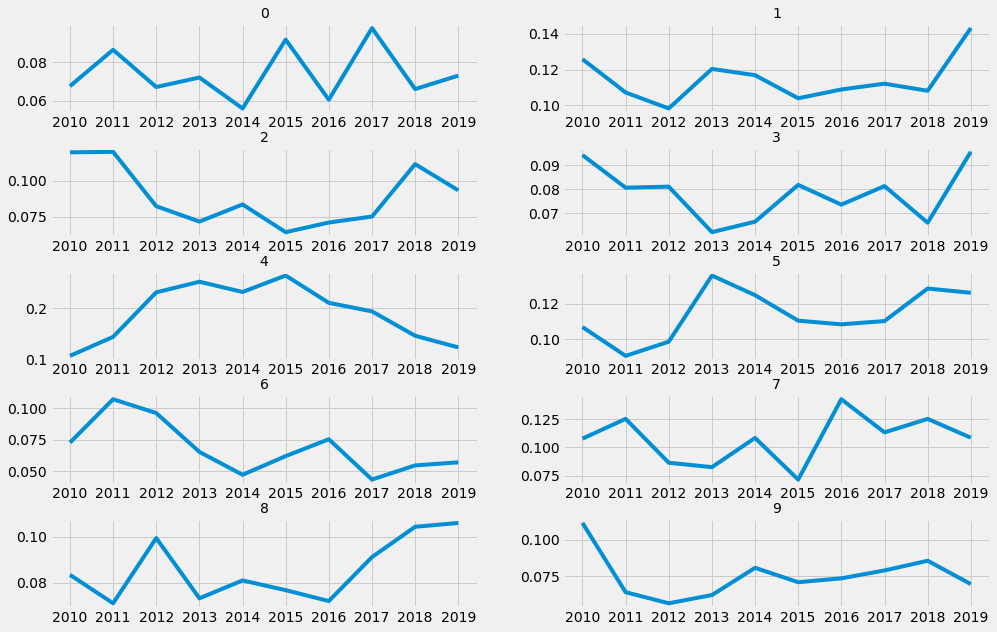

In [71]:
plt.style.use('fivethirtyeight')
fig,axs = plt.subplots(5,2,figsize = [15,10])
for ax,column in zip(axs.flat,evolution_df.groupby('Date').mean().columns):
    ax.plot(evolution_df.groupby('Date').mean()[column])
    ax.set_title(column,{'fontsize':14})
plt.subplots_adjust(hspace=0.4)

Next, we plot the marginal topic distribution, i.e., the relative importance of the topics. It is calculated by summing the topic weights of all documents.

First, we calculate the topic weights for every document.

In [86]:
doc_tops = []
for doc in corpus:
    doc_tops.append([item for (_,item) in lda_model.get_document_topics(doc)])
doc_tops_df = pd.DataFrame(doc_tops,columns=top_words_df.columns)

Then, we sum (and plot) these weights.

In [98]:
doc_tops_df = doc_tops_df/doc_tops_df.sum().sum()

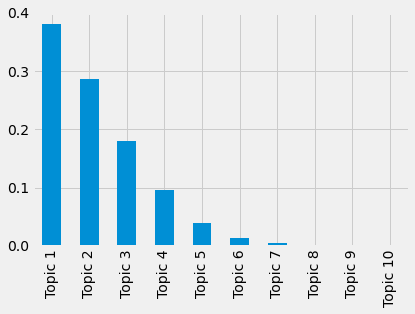

In [99]:
doc_tops_df.sum(axis=0).plot.bar()

As our subsequent analysis, let's search the most representative document for each topic. It is the document that has the largest weight for a certain topic.

In [100]:
doc_topics = []
for doc in corpus:
    doc_topics.append([item for (_,item) in lda_model.get_document_topics(doc)])               

In [101]:
temp_df = pd.DataFrame(doc_topics)

With **idxmax()**, we can pick up the index that has the largest weight.

In [102]:
temp_df.idxmax()

0    1172
1    1775
2     858
3    1705
4    1644
5     133
6     517
7    1203
8     303
dtype: int64

We can now use **files** to connect indices to documents. For example, the most representative document of Topic 1 (index 0) is "PRACTICING SAFE COMPUTING: A MULTIMETHOD EMPIRICAL EXAMINATION OF HOME COMPUTER USER SECURITY BEHAVIORAL INTENTIONS"

In [105]:
files[1172]

'2010_2729.txt'

In [106]:
raw_text[1172][0:500]

'Anderson & Agarwal/Practicing Safe Computing\n\nSPECIAL ISSUE\n\nPRACTICING SAFE COMPUTING: A MULTIMETHOD EMPIRICAL EXAMINATION OF HOME COMPUTER USER SECURITY BEHAVIORAL INTENTIONS1\n\nBy: Catherine L. Anderson Decision, Operations, and Information Technologies Department Robert H. Smith School of Business University of Maryland Van Munching Hall College Park, MD 20742-1815 U.S.A. Catherine_Anderson@rhsmith.umd.edu\nRitu Agarwal Center for Health Information and Decision Systems Robert H. Smith School '

Let's build a master table that has the document names and other information.

In [107]:
master_df = pd.DataFrame({'Article':files})

First, we add the most important topic of each article to the table.

In [108]:
top_topic = []
for doc in corpus:
    test=lda_model.get_document_topics(doc)
    test2 = [item[1] for item in test]
    top_topic.append(test2.index(max(test2))+1)

master_df['Top topic'] = top_topic

With **head()**, we can check the first (ten) values of our dataframe.

In [109]:
master_df.head(10)

,Article,Top topic
0,2019_1167.txt,1
1,2017_27218.txt,3
2,2012_40089.txt,3
3,2012_2684.txt,2
4,2015_16392.txt,1
5,2019_3891.txt,1
6,2011_1162.txt,1
7,2015_19684.txt,4
8,2010_2866.txt,2
9,2018_30301.txt,2


**value_counts()** for the "Top topic" -column can be used to check that in how many documents each topic is the most important.

In [110]:
master_df['Top topic'].value_counts()

1    794
2    604
3    402
4    210
5     81
6     23
7      9
9      2
8      1
Name: Top topic, dtype: int64

### Summarisation

Let's do something else. Gensim also includes efficient summarisation-functions (these are not related to LDA any more):

From the **summarization** -module, we can use **summarize** to automatically build a short summarisation of the document. Notice that we use the original documents for this and not the preprocessed ones. **ratio = 0.01** means that the length of the summarisation should be 1 % from the original document.

In [111]:
summary = []
for file in raw_text:
    summary.append(gensim.summarization.summarize(file.replace('\n',' '),ratio=0.01))

Below is an example summary for the first document.

In [113]:
summary[1]

'*NLM Title Abbreviation:*     J Appl Psychol *Publisher:*     US : American Psychological Association *ISSN:*     0021-9010 (Print)     1939-1854 (Electronic) *ISBN:*     978-1-4338-9042-0 *Language:*     English *Keywords:*     ability, personality, interests, motivation, individual differences *Abstract:*     This article reviews 100 years of research on individual differences     and their measurement, with a focus on research published in the     Journal of Applied Psychology.\nWe focus on 3 major individual     differences domains: (a) knowledge, skill, and ability, including     both the cognitive and physical domains; (b) personality, including     integrity, emotional intelligence, stable motivational attributes     (e.g., achievement motivation, core self-evaluations), and     creativity; and (c) vocational interests.\n(PsycINFO Database Record (c) 2017 APA, all     rights reserved) *Document Type:*     Journal Article *Subjects:*     *Individual Differences; *Measurement; *M

In [114]:
master_df['Summaries'] = summary

In [115]:
master_df

,Article,Top topic,Summaries
0,2019_1167.txt,1,We add to the literature on the economics of c...
1,2017_27218.txt,3,*NLM Title Abbreviation:* J Appl Psychol *...
2,2012_40089.txt,3,Service Quality in Software-as-a-Service: Deve...
3,2012_2684.txt,2,RESEARCH ARTICLE UNDERSTANDING USER REVISIONS...
4,2015_16392.txt,1,*Document Type:* Article *Subject Terms:* ...
...,...,...,...
2121,2016_2942.txt,1,{rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...
2122,2016_81.txt,2,J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...
2123,2018_13221.txt,6,"Sinha Carlson School of Management, University..."
2124,2016_23236.txt,1,*Document Type:* Article *Subject Terms:* ...


The same **summarization** -module also includes a function to search keywords from the documents. It works in the same way as **summarize()**.

In [116]:
keywords = []
for file in raw_text:
    keywords.append(gensim.summarization.keywords(file.replace('\n',' '),ratio=0.01).replace('\n',' '))

Here are keywords for the second document

In [119]:
keywords[1]

'journal journals psychology psychological personality person personal research researchers researched performance performing perform performed performances testing tests test tested measurement measures measureable measure measured measuring ability abilities difference different differing differs study studies studied individual differences individuals differ job jobs interests interesting interested including include includes included traits trait'

In [117]:
master_df['Keywords'] = keywords

In [118]:
master_df

,Article,Top topic,Summaries,Keywords
0,2019_1167.txt,1,We add to the literature on the economics of c...,bitcoin bitcoins user users transactions trans...
1,2017_27218.txt,3,*NLM Title Abbreviation:* J Appl Psychol *...,journal journals psychology psychological pers...
2,2012_40089.txt,3,Service Quality in Software-as-a-Service: Deve...,service services saas research researchers cus...
3,2012_2684.txt,2,RESEARCH ARTICLE UNDERSTANDING USER REVISIONS...,use uses usefulness features feature user user...
4,2015_16392.txt,1,*Document Type:* Article *Subject Terms:* ...,automation automated automate work working hum...
...,...,...,...,...
2121,2016_2942.txt,1,{rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...,data ehr ehrs research researchers health pati...
2122,2016_81.txt,2,J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...,organizational relationship relationships altr...
2123,2018_13221.txt,6,"Sinha Carlson School of Management, University...",firms firm production product products modelin...
2124,2016_23236.txt,1,*Document Type:* Article *Subject Terms:* ...,reviewer reviews review reviewers reviewed rev...


### Similarities
As a next example, we analyse the similarities between the documents.

Gensim has a specific function for that: **SparseMatrixSimilarity**

In [120]:
from gensim.similarities import SparseMatrixSimilarity

The parameters to the function are the word-frequency corpus and the length of the dictionary.

In [121]:
index = SparseMatrixSimilarity(corpus,num_features=len(id2word))

In [122]:
sim_matrix = index[corpus]

In the similarity matrix, the diagonal has values 1 (similarity of a document with itself). We replace those values with zero to find the most similar documents from the corpus.

In [124]:
for i in range(len(sim_matrix)):
    sim_matrix[i,i] = 0

**Seaborn** (https://seaborn.pydata.org/) has a convenient heatmap function to plot similarities. Here is information about Seaborn from their web page: Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

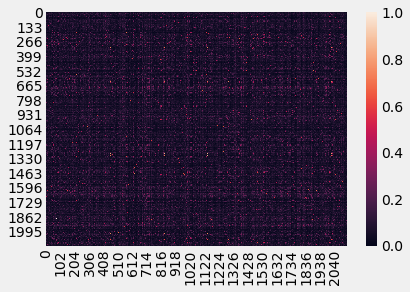

In [125]:
sns.heatmap(sim_matrix)

We search the most similar article by locating the index with a largest value for every column.

In [127]:
master_df['Most_similar_article'] = np.argmax(sim_matrix,axis=1)

In [128]:
master_df

,Article,Top topic,Summaries,Keywords,Most_similar_article
0,2019_1167.txt,1,We add to the literature on the economics of c...,bitcoin bitcoins user users transactions trans...,1306
1,2017_27218.txt,3,*NLM Title Abbreviation:* J Appl Psychol *...,journal journals psychology psychological pers...,2090
2,2012_40089.txt,3,Service Quality in Software-as-a-Service: Deve...,service services saas research researchers cus...,28
3,2012_2684.txt,2,RESEARCH ARTICLE UNDERSTANDING USER REVISIONS...,use uses usefulness features feature user user...,1796
4,2015_16392.txt,1,*Document Type:* Article *Subject Terms:* ...,automation automated automate work working hum...,1280
...,...,...,...,...,...
2121,2016_2942.txt,1,{rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...,data ehr ehrs research researchers health pati...,301
2122,2016_81.txt,2,J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...,organizational relationship relationships altr...,2070
2123,2018_13221.txt,6,"Sinha Carlson School of Management, University...",firms firm production product products modelin...,1942
2124,2016_23236.txt,1,*Document Type:* Article *Subject Terms:* ...,reviewer reviews review reviewers reviewed rev...,1917


### Cluster model

Next, we build a topic analysis using a different approach. We create a TF-IDF model from the corpus and apply K-means clustering for that model.

Explanation of TF-IDF from Wikipedia: "In information retrieval, TF–IDF or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modelling. The TF–IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general."

Explanation of K-means clustering from Wikipedia: "k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centres or cluster centroid), serving as a prototype of the cluster...k-means clustering minimizes within-cluster variances (squared Euclidean distances)..."

![kmeans](./images/kmeans.gif)

From **Gensim.models** we pick up **TfidModel**.

In [129]:
from gensim.models import TfidfModel

As parameters, we need the corpus and the dictionary.

In [131]:
tf_idf_model = TfidfModel(corpus,id2word=id2word)

We use the model to build up a TF-IDF -transformed corpus.

In [141]:
tform_corpus = tf_idf_model[corpus]

**corpus2csc** converts a streamed corpus in bag-of-words format into a sparse matrix, with documents as columns.

In [142]:
spar_matr = gensim.matutils.corpus2csc(tform_corpus)

In [143]:
spar_matr

<32237x2126 sparse matrix of type '<class 'numpy.float64'>'
	with 1897708 stored elements in Compressed Sparse Column format>

Sparse matrix to normal array. Also, we need to transpose it for the K-means model.

In [144]:
tfidf_matrix = spar_matr.toarray().transpose()

In [145]:
tfidf_matrix

array([[0.00125196, 0.00243009, 0.00474072, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00594032, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0077254 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00396927, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [146]:
tfidf_matrix.shape

(2126, 32237)

Scikit-learn has a function to form a K-means clustering model from a matrix. It is done below. We use ten clusters.

In [147]:
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=10)

kmodel.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [148]:
master_df['Tf_idf_clusters'] = clusters

In [156]:
km.cluster_centers_

array([[ 1.33476883e-03,  4.71424426e-03,  2.62007897e-04, ...,
         2.71050543e-20,  3.38813179e-21,  0.00000000e+00],
       [ 6.67748803e-04,  9.98513608e-04,  9.39093177e-04, ...,
         1.00166900e-03,  6.77626358e-21,  5.77802403e-05],
       [ 1.96181867e-04,  3.44260097e-04,  1.83757076e-04, ...,
        -5.42101086e-20,  0.00000000e+00, -3.38813179e-21],
       ...,
       [ 0.00000000e+00,  3.26892198e-03,  1.67826509e-03, ...,
        -8.13151629e-20, -1.69406589e-21, -3.38813179e-21],
       [ 5.84538250e-04,  1.55948712e-03,  2.28571545e-04, ...,
         0.00000000e+00, -3.38813179e-21, -3.38813179e-21],
       [ 5.10233572e-04,  4.11021862e-03,  1.24048649e-03, ...,
        -2.71050543e-20,  1.69406589e-21, -3.38813179e-21]])

In [152]:
master_df

,Article,Top topic,Summaries,Keywords,Most_similar_article,Tf_idf_clusters
0,2019_1167.txt,1,We add to the literature on the economics of c...,bitcoin bitcoins user users transactions trans...,1306,5
1,2017_27218.txt,3,*NLM Title Abbreviation:* J Appl Psychol *...,journal journals psychology psychological pers...,2090,4
2,2012_40089.txt,3,Service Quality in Software-as-a-Service: Deve...,service services saas research researchers cus...,28,4
3,2012_2684.txt,2,RESEARCH ARTICLE UNDERSTANDING USER REVISIONS...,use uses usefulness features feature user user...,1796,4
4,2015_16392.txt,1,*Document Type:* Article *Subject Terms:* ...,automation automated automate work working hum...,1280,2
...,...,...,...,...,...,...
2121,2016_2942.txt,1,{rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...,data ehr ehrs research researchers health pati...,301,8
2122,2016_81.txt,2,J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...,organizational relationship relationships altr...,2070,4
2123,2018_13221.txt,6,"Sinha Carlson School of Management, University...",firms firm production product products modelin...,1942,5
2124,2016_23236.txt,1,*Document Type:* Article *Subject Terms:* ...,reviewer reviews review reviewers reviewed rev...,1917,5


Let's collect the ten most important words for each cluster.

In [158]:
centroids = km.cluster_centers_.argsort()[:, ::-1] # Sort the words according to their importance.

for i in range(num_clusters):
    j=i+1
    print("Cluster %d words:" % j, end='')
    for ind in centroids[i, :10]:
        print(' %s' % id2word.id2token[ind],end=',')
    print()
    print()

Cluster 1 words: patent, movie, tweet, invention, citation, inventor, innovation, twitter, follower, release,

Cluster 2 words: analytic, innovation, digital, capability, governance, supply_chain, sustainability, right_reserve, big, platform,

Cluster 3 words: persistent_linking, site_ehost, true_db, learning_please, academic_licensee, syllabus_mean, newsletter_content, electronic_reserve, authorize_ebscohost, course_pack,

Cluster 4 words: auction, bidder, bid, advertiser, bidding, price, pricing, combinatorial_auction, seller, valuation,

Cluster 5 words: team, employee, job, organizational, project, ethic, security, task, member, community,

Cluster 6 words: consumer, privacy, web_delivery, rating, disclosure, investor, participant, website, app, wom,

Cluster 7 words: brand, marketing, retailer, consumer, advertising, purchase, marketer, elasticity, promotion, sale,

Cluster 8 words: optimization, optimal, theorem, algorithm, node, approximation, scheduling, constraint, parameter, 

With a smaller corpus, we could use fancy visualisations, like multidimensional scaling and Ward-clustering, to represent the document relationship. However, with over 2000 documents, that is not meaningful. Below are examples of both (not related to our analysis).

![mds](./images/mds.png)

![ward](./images/ward.jpg)

With pandas **crosstab**, we can easily check the connection between the LDA topics and the K-means clusters.

In [159]:
pd.crosstab(master_df['Top topic'],master_df['Tf_idf_clusters'])

Tf_idf_clusters,0,1,2,3,4,5,6,7,8,9
Top topic,,,,,,,,,,
1,14,151,91,10,175,157,28,77,32,59
2,10,122,44,13,138,124,21,37,39,56
3,7,79,21,4,76,114,15,25,18,43
4,5,30,6,1,31,84,16,8,9,20
5,1,8,0,2,12,34,6,2,7,9
6,1,1,0,1,2,13,0,0,2,3
7,0,0,0,0,2,6,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,1
